1. import library that needed

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno #to handle missing value
import matplotlib.pyplot as plt #plot library
import seaborn as sns #visualization library
from sklearn.impute import KNNImputer #do inputation
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std
from scipy import stats

2. Import Dataset

In [53]:
from google.colab import files
upload = files.upload()

Saving data_analyst_intern_case_study-dataset.xlsx to data_analyst_intern_case_study-dataset (1).xlsx


In [54]:
data = pd.read_excel('data_analyst_intern_case_study-dataset.xlsx')
users = data.copy()
pd.set_option('display.max_row',users.shape[0])
pd.set_option('display.max_column',users.shape[1])
users.head()

,ID,Age,Income,Education_Level,Employment_Status,Hours_Spent_on_Technology_Per_Day,Exercise_Hours_per_Week,Healthy_Eating_Score,Life_Satisfaction
0,1,55,119997,High School,Retired,4.7,5.8,3,Satisfied
1,2,61,44571,PhD,Unemployed,2.3,4.0,2,Satisfied
2,3,30,111130,PhD,Employed,7.4,9.7,5,Not Satisfied
3,4,26,83848,High School,Employed,4.1,1.5,1,Satisfied
4,5,27,31806,PhD,Retired,3.6,9.0,4,Neutral


In [55]:
data.shape

(500, 9)

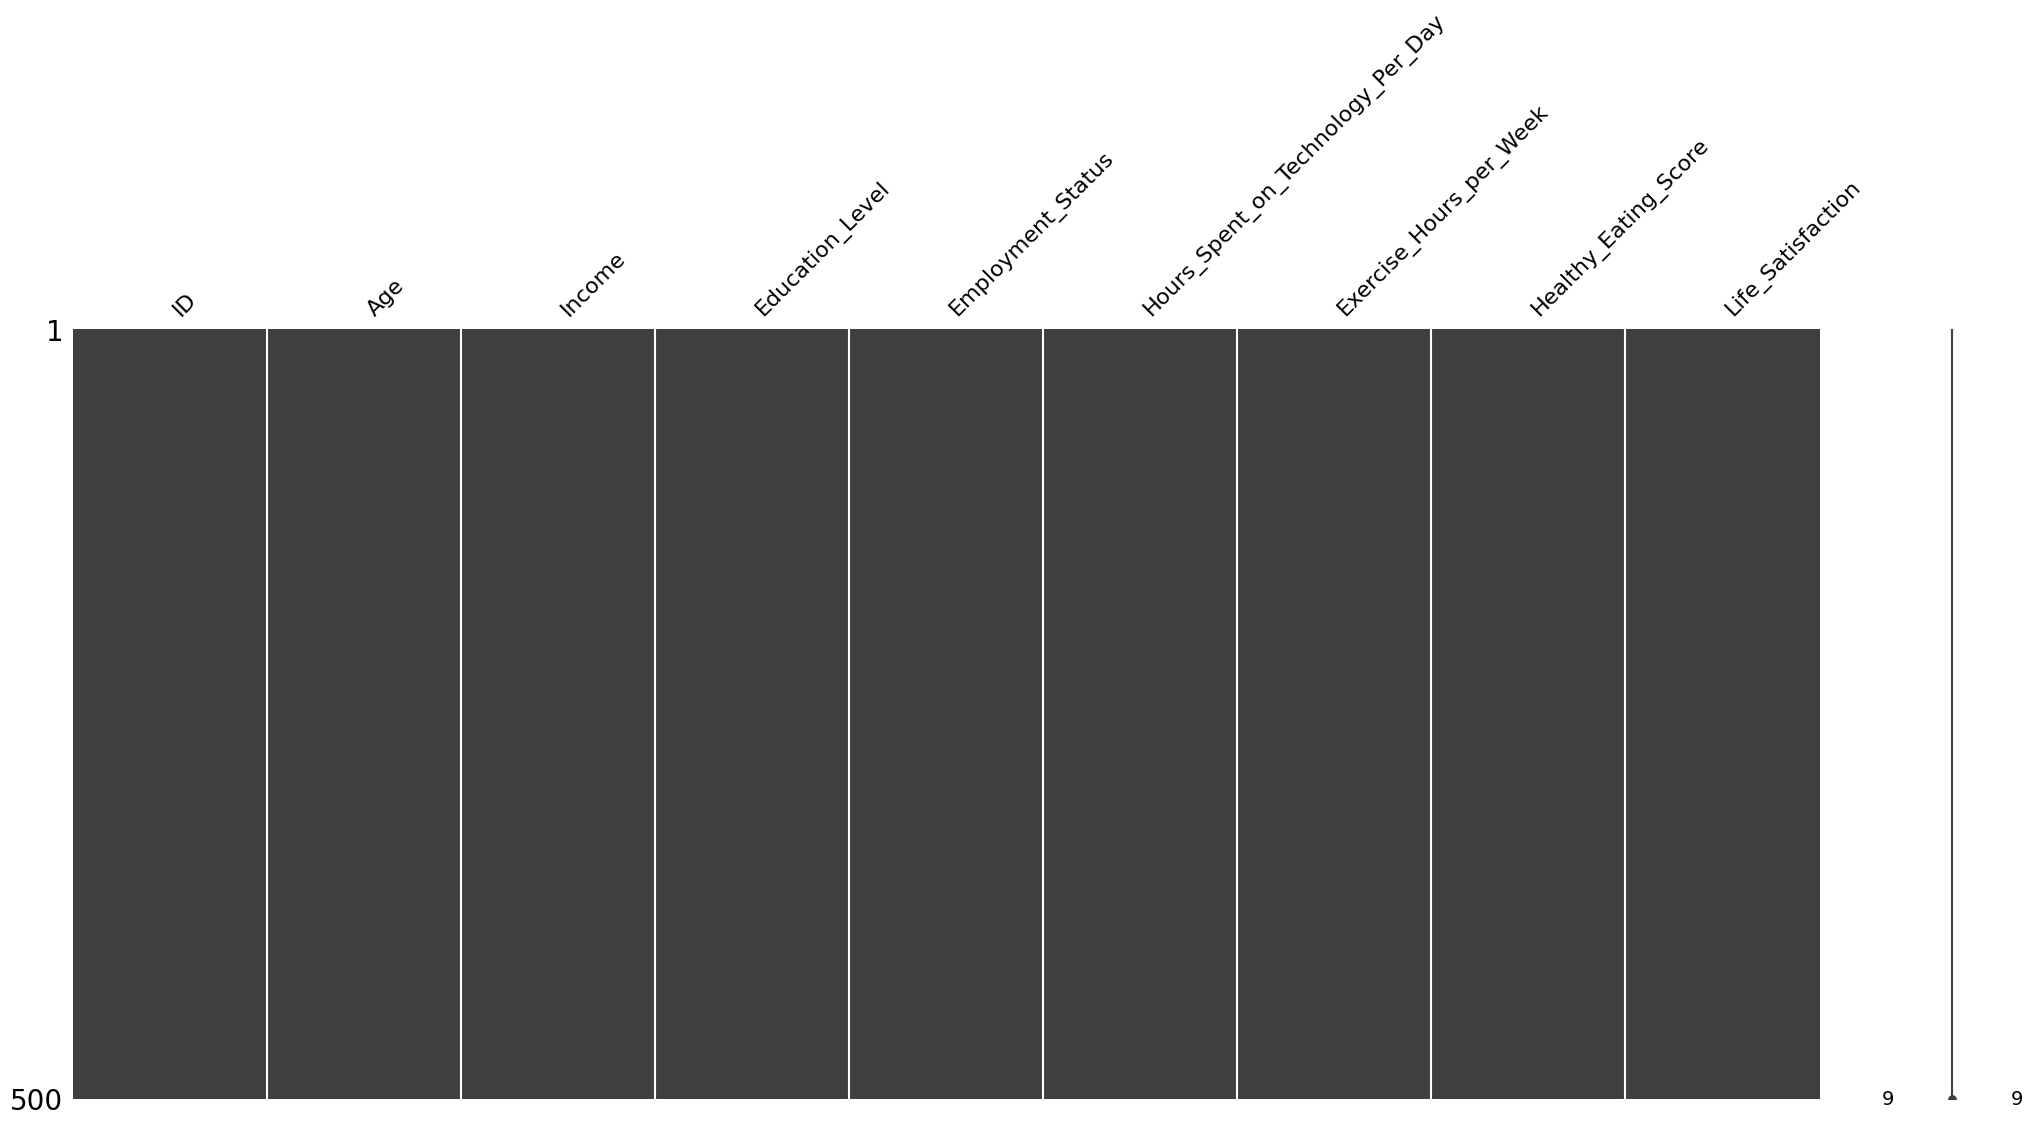

In [56]:
# Visualize the general missing values of data
msno.matrix(data)
plt.show()

Summary : No missing value

In [57]:
missingvalues = data.isnull().sum()
print(missingvalues.loc[missingvalues!=0], '\n')

Series([], dtype: int64) 



In [58]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 500 non-null    int64  
 1   Age                                500 non-null    int64  
 2   Income                             500 non-null    int64  
 3   Education_Level                    500 non-null    object 
 4   Employment_Status                  500 non-null    object 
 5   Hours_Spent_on_Technology_Per_Day  500 non-null    float64
 6   Exercise_Hours_per_Week            500 non-null    float64
 7   Healthy_Eating_Score               500 non-null    int64  
 8   Life_Satisfaction                  500 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 35.3+ KB
None


In [59]:
data.describe()

,ID,Age,Income,Hours_Spent_on_Technology_Per_Day,Exercise_Hours_per_Week,Healthy_Eating_Score
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,43.49200,69428.794000,4.075000,5.196400,2.954000
std,144.481833,14.68923,29537.107166,2.345583,2.855629,1.372462
min,1.000000,18.00000,20018.000000,0.000000,0.000000,1.000000
25%,125.750000,31.00000,44261.500000,2.075000,2.500000,2.000000
50%,250.500000,43.00000,67668.500000,4.000000,5.300000,3.000000
75%,375.250000,56.00000,96746.500000,6.100000,7.700000,4.000000
max,500.000000,69.00000,119997.000000,8.000000,10.000000,5.000000


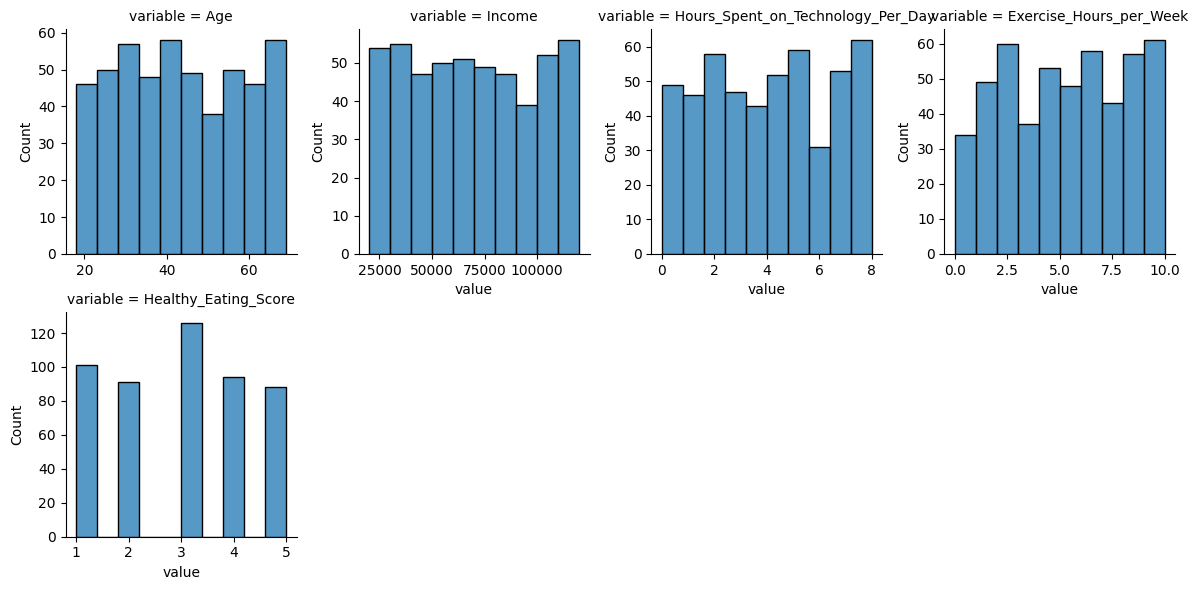

In [60]:
df = pd.DataFrame(data=data, columns=['Age','Income','Hours_Spent_on_Technology_Per_Day','Exercise_Hours_per_Week','Healthy_Eating_Score'])

nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.histplot, 'value')
n1

In [61]:
df = data[['Age','Income','Hours_Spent_on_Technology_Per_Day','Exercise_Hours_per_Week','Healthy_Eating_Score']]

fig = px.box(df.melt(), y="value", facet_col="variable",facet_col_wrap=2, boxmode="overlay", color="variable",height=1000, width=900)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

fig.show()

<Axes: >

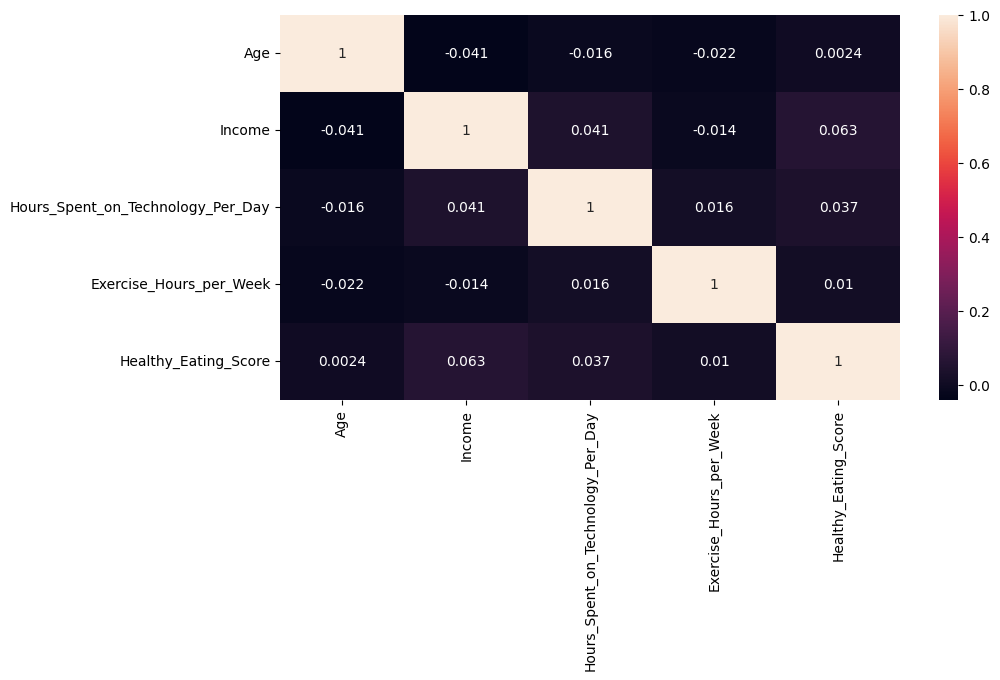

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

Histogram Visualization (Education level distribution by income level)

In [63]:
plot= data[['Income','Education_Level']]
category_orders={"Education_Level":["High School","Bachelor","Master","PhD"]}
fig = px.histogram(plot, x="Education_Level",y="Income",  histfunc='avg',category_orders=category_orders)
fig.show()

Linear Regression Visualization (Income distribution by age)

In [64]:
reg = LinearRegression()
fig = go.Figure(data=go.Scatter(name='observations',y=data['Income'], x=data['Age'],mode='markers'))

fig.update_traces(hovertemplate='Income: %{y} <br>Age: %{x}')
fig.show()

Pie Chart Visualization (Correlation between Education level and Life Satisfaction)

In [65]:
df = data[['Education_Level','Life_Satisfaction']]

fig = px.sunburst(df, path=['Life_Satisfaction','Education_Level'],color_discrete_sequence=px.colors.sequential.Rainbow)
fig.show()

Histogram Quantitative and Qualitative Data (Income and Satisfaction Level)

In [66]:
fig = px.histogram(data,
                   x='Income',
                   marginal='box',
                   color='Life_Satisfaction',
                   color_discrete_sequence=['blue', 'green', 'red'],
                   title='Correlation between income and life satisfaction')
fig.update_layout(bargap=0.1)
fig.show()

In [67]:
data['Education_Level']=data['Education_Level'].replace({'High School':12,'Bachelor':16,'Master':18,'PhD':21})

In [68]:
data.describe()

,ID,Age,Income,Education_Level,Hours_Spent_on_Technology_Per_Day,Exercise_Hours_per_Week,Healthy_Eating_Score
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,43.49200,69428.794000,17.020000,4.075000,5.196400,2.954000
std,144.481833,14.68923,29537.107166,3.260808,2.345583,2.855629,1.372462
min,1.000000,18.00000,20018.000000,12.000000,0.000000,0.000000,1.000000
25%,125.750000,31.00000,44261.500000,16.000000,2.075000,2.500000,2.000000
50%,250.500000,43.00000,67668.500000,18.000000,4.000000,5.300000,3.000000
75%,375.250000,56.00000,96746.500000,21.000000,6.100000,7.700000,4.000000
max,500.000000,69.00000,119997.000000,21.000000,8.000000,10.000000,5.000000


**Statistical Hypothesis Testing**

1. Is the average salary of PhD respondents statistically different from High School respondents ?
2. Is there any correlation between income and Life Satisfaction significant ?
3. Is there correlation between Degree Owned and life satisfaction ?

To know which one to use, normality tests must be done on our data. If our data have a known and specific distribution, such as the Gaussian distribution; parametric statistical methods must be used. On the contrary, if data are not Gaussian, nonparametric statistical methods should be used.

There are two main ways to know if our data are Gaussian :

Graphical methods

Histogram plot
QQ plot
Statistical methods

Shapiro test
D'Agostino and Pearson test
Anderson-Darling test
Kolmogorov-Smirnov test
Graphical methods are mainly used for qualifying deviations from normality

Statistical methods are mainly used for quantifying deviations from normality

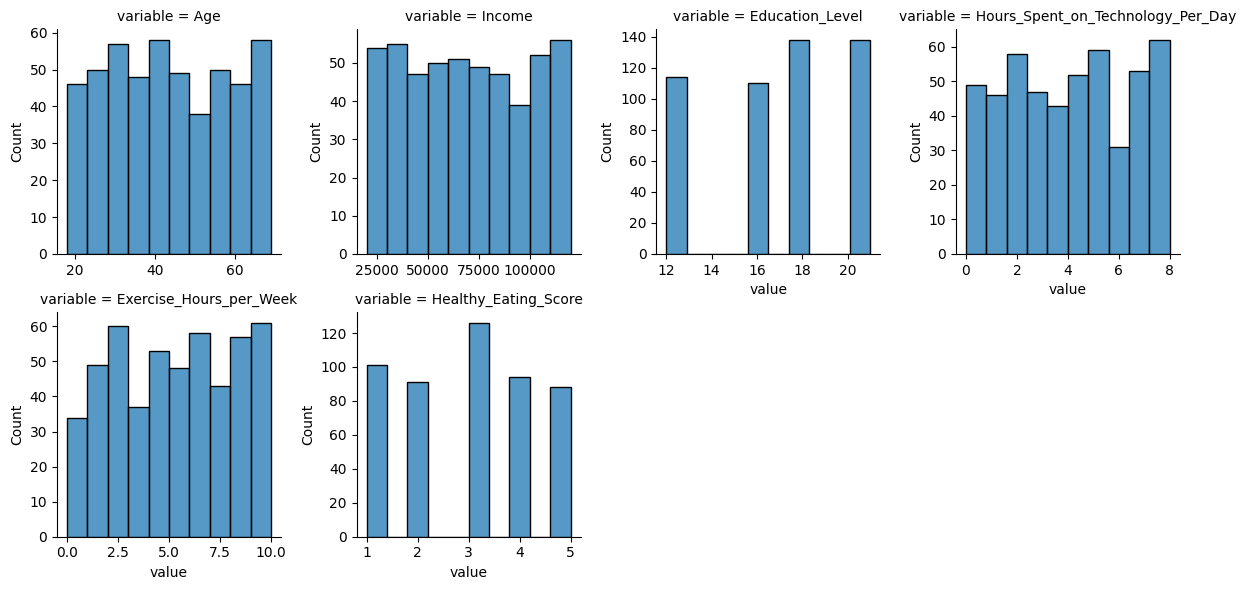

In [69]:
df = pd.DataFrame(data=data, columns=['Age','Income','Education_Level','Hours_Spent_on_Technology_Per_Day','Exercise_Hours_per_Week','Healthy_Eating_Score'])
nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.histplot, 'value')
n1

From the graph, we can immediately see which variables seem to be Gaussian or Gaussian-like :

Age, Income, Hours_Spent_on_Technology_Per_Day, and Exercise_Hours_per_Week have Gaussian-like distributions

Educationnal_Level and Healthy_Eating Score has a Multinomial distribution

We can verify with a statistical method that none of our variables is Gaussian

**Shapiro Test**

In [70]:
X=['Age','Income','Education_Level','Hours_Spent_on_Technology_Per_Day','Exercise_Hours_per_Week','Healthy_Eating_Score']

column_dict= {elem : pd.DataFrame() for elem in X}

def shapiro_test(data):
    stat, p = shapiro(data)
    print('%s : Statistics=%.3f, p=%.3f' % (column,stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (We fail to reject H0)')
    else:
        print('Sample does not look Gaussian (We reject H0)')

for column in X:
    column_dict[column] = data[column]
    shapiro_test(column_dict[column])

Age : Statistics=0.958, p=0.000
Sample does not look Gaussian (We reject H0)
Income : Statistics=0.950, p=0.000
Sample does not look Gaussian (We reject H0)
Education_Level : Statistics=0.849, p=0.000
Sample does not look Gaussian (We reject H0)
Hours_Spent_on_Technology_Per_Day : Statistics=0.950, p=0.000
Sample does not look Gaussian (We reject H0)
Exercise_Hours_per_Week : Statistics=0.953, p=0.000
Sample does not look Gaussian (We reject H0)
Healthy_Eating_Score : Statistics=0.896, p=0.000
Sample does not look Gaussian (We reject H0)


All the p-values are inferior to 0.05 :

We reject the null-hypothesis. Our variables are not Gaussian at a 5% significance level

We will use nonparametric statistical methods to test our hypotheses

Rank Significance Tests
Numerical variables : Mann-Whitney's test
Our first question was to find if the average salary of PhD respondents statistically different from High School respondents

Hypothesis statement
H_0 : The mean ranks of the two groups are equal

H_a : The mean ranks of the two groups are not equal

Analysis plan formulation
Significance level : We will test our hypothesis at a 5% significance level

Test method : We use the Mann-Whitney's test to determine whether one group has higher or lower income than the other group. Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution. The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions. Therefore, if our assumption is correct, the result of the test should enable us to reject the null hypothesis.

In [71]:
life=data[['Life_Satisfaction','Income']]

Not_Satisfied=life[life['Life_Satisfaction']=='Not Satisfied']
Neutral=life[life['Life_Satisfaction']=='Neutral']
Satisfied=life[life['Life_Satisfaction']=='Satisfied']

In [72]:
# normality tests of our two samples
stat, p = shapiro(Not_Satisfied.Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.945, p=0.000
Sample does not look Gaussian (reject H0)


In [73]:
# normality tests of our two samples
stat, p = shapiro(Neutral.Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.947, p=0.000
Sample does not look Gaussian (reject H0)


In [74]:
# normality tests of our two samples
stat, p = shapiro(Satisfied.Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.946, p=0.000
Sample does not look Gaussian (reject H0)


Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables.

Our second question was to find if there is a statistically significant correlation between the income and age.

1. Hypothesis statement
H_0 : There is no monotonic association between income and age
H_a : There is a monotonic association between income and age
2. Analysis plan formulation
Significance level : We will test our hypothesis at 5% significance level
Test method : We use the Spearman rank correlation test to determine if our two variables are correlated. This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship. As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).
Therefore, if our assumption is correct, the result of the test should enable us to reject the null hypothesis.

In [75]:
Age=data[['Age','Income']]

cor, pval = stats.spearmanr(Age[['Age']], Age[['Income']])
print("Non-Parametric Spearman correlation test : correlation coefficient : %.4f, pval: %.4f" % (cor, pval))

Non-Parametric Spearman correlation test : correlation coefficient : -0.0439, pval: 0.3272


The closer Rs is to +1 or -1, the stronger the likely correlation. A perfect positive correlation is +1 and a perfect negative correlation is -1. The Rs value of -0.0439 suggests a fairly weak negative relationship.

The weak correlation coefficient induces a Weak negative relationship between the two variables, that's mean fail to reject H0

Categorical variables : Chi-square test for independance
Our third question was to find if there is a statistically significant correlation between the diploma and the life satisfaction.

1. Hypothesis statement
H_0 : Education level and life satisfaction are independent
H_a : Education level and life satisfaction are not independent

2. Analysis plan formulation
Significance level : We will test our hypothesis at a 5% significance level
Test method : We use the Chi-square test for independence to determine whether there is a significant relationship between our two categorical variables.

Categorical variables : Chi-square test for independance
Our third question was to find if there is a statistically significant correlation between the diploma and the marital situation.

1. Hypothesis statement
H_0 : Education and Life_Satisfaction are independent
H_a : Education and Life_Satisfaction are not independent

2. Analysis plan formulation
Significance level : We will test our hypothesis at a 5% significance level
Test method : We use the Chi-square test for independence to determine whether there is a significant relationship between our two categorical variables.

In [76]:
Life_Satisfaction=data[['Education_Level','Life_Satisfaction']]
crosstab = pd.crosstab(Life_Satisfaction["Education_Level"], Life_Satisfaction["Life_Satisfaction"])
crosstab

Life_Satisfaction,Neutral,Not Satisfied,Satisfied
Education_Level,,,
12,39,36,39
16,44,36,30
18,57,32,49
21,58,42,38


In [77]:
stat, p, dof, expected = chi2_contingency(crosstab)
print('Degress of freedom = %d' % dof)

Degress of freedom = 6


In [78]:
print(expected)

[[45.144 33.288 35.568]
 [43.56  32.12  34.32 ]
 [54.648 40.296 43.056]
 [54.648 40.296 43.056]]


In [79]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=12.592, stat=5.906


P-value :

The P-value is the probability of observing a sample statistic as extreme as the test statistic. Since the test statistic is a Chi-square, we should use use the Chi-Square table to assess the probability associated with the test statistic by using the degrees of freedom we found above.

In [80]:
if abs(stat) >= critical:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')

Independent (We fail to reject H0)
significance=0.050, p=0.434
Independent (We fail to reject H0)


Interpretation of the results

We can interpret the results by two ways :

The P-value is superior than the significance level of 5%, we fail to reject the null hypothesis.

The Test-statistic is inferior than the critical value, we fail to reject the null hypothesis.

We can conclude that the life satisfaction is independent from the diploma owned at a 95% confidence level